In [2]:
# Example code for creating a figure of suitable size
# for inclusion in the term paper.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandasql as ps
import matplotlib as mpl


plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['text.usetex'] = False
# Color cycle for color blind Source: https://gist.github.com/thriveth/8560036
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']   # https://gist.github.com/thriveth/8560036

# Set the default color cycle
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=CB_color_cycle) 

In [3]:
# Function for a consistent length of figures of 84 mm, converting to inches
def new_figure(height=55):
    "Return figure with width 84mm and given height in mm."

    return plt.figure(figsize=(84/10.16, height/10.16))

# x = range(10)
# y = [v**2 - 1 for v in x]

# fig = new_figure()
# ax = fig.add_subplot(1, 1, 1)
# ax.plot(x, y, 'o-', label='$y=x^2-1$')
# ax.legend()
# ax.set_xlabel('$x$')
# ax.set_ylabel('$y$')
# fig.savefig('sample_plot.pdf', bbox_inches='tight')
# plt.show()

### Reading all the different CSVs produced by each run of the time_it function 

In [4]:
# merge_sort_already_sorted= pd.read_csv("merge_sort_already_sorted.csv")
# merge_sort_random= pd.read_csv("merge_sort_random.csv")
# merge_sort_reverse_sorted= pd.read_csv("merge_sort_reverse_sorted.csv")

# quick_sort_random= pd.read_csv("quick_sort_random.csv")
# quick_sort_already_sorted_till_2560= pd.read_csv("quick_sort_sorted.csv")
# quick_sort_reverse_sorted_till_2560= pd.read_csv("quick_sort_reverse_sorted.csv")

# heap_sort_already_sorted= pd.read_csv("heap_sort_already_sorted.csv")
# heap_sort_random= pd.read_csv("heap_sort_random.csv")
# heap_sort_reverse_sorted= pd.read_csv("heap_sort_reverse_sorted.csv")

# numpy_sort_already_sorted= pd.read_csv("numpy_sort_already_sorted.csv")
# numpy_sort_random= pd.read_csv("numpy_sort_random.csv")
# numpy_sort_reverse_sorted= pd.read_csv("numpy_sort_reverse_sorted.csv")

# python_sorted_already_sorted= pd.read_csv("sorted_already_sorted.csv")
# python_sorted_random= pd.read_csv("sorted_random.csv")
# python_sorted_reverse_sorted= pd.read_csv("sorted_reverse_sorted.csv")         


In [5]:
# dataset=pd.concat([merge_sort_already_sorted, merge_sort_random, merge_sort_reverse_sorted, 
#                    quick_sort_random,quick_sort_already_sorted_till_2560,quick_sort_reverse_sorted_till_2560,
#                    heap_sort_already_sorted, heap_sort_random, heap_sort_reverse_sorted,
#                    numpy_sort_already_sorted, numpy_sort_random, numpy_sort_reverse_sorted,
#                    python_sorted_already_sorted, python_sorted_random, python_sorted_reverse_sorted])


# dataset.loc[ dataset['Data_Type_or_List_type']=='already_sorted', ['Data_Type_or_List_type'] ] ='sorted'
# dataset.loc[ dataset['Data_Type_or_List_type']=='reverese_sorted', ['Data_Type_or_List_type'] ] ='reverse_sorted'
# dataset.loc[ dataset['Data_Type_or_List_type']=='reverse', ['Data_Type_or_List_type'] ] ='reverse_sorted'
# dataset.reset_index(drop=True)

# dataset.to_csv("dataset_concat.csv", index=False)

dataset = pd.read_csv("dataset_concat.csv")
print (np.unique(dataset['Data_Type_or_List_type']).tolist())
print(dataset.shape)

['random', 'reverse_sorted', 'sorted']
(2037, 6)


In [6]:
dataset.head()

,Sort_Type,Data_Type_or_List_type,List_length,Runtimes,Number_of_repeatitions,Datetime
0,merge_sort,sorted,10,0.267837,7,2019-11-01 21:51:45.110982
1,merge_sort,sorted,10,0.277732,7,2019-11-01 21:51:45.110982
2,merge_sort,sorted,10,0.274984,7,2019-11-01 21:51:45.110982
3,merge_sort,sorted,10,0.250366,7,2019-11-01 21:51:45.110982
4,merge_sort,sorted,10,0.233188,7,2019-11-01 21:51:45.110982


In [7]:
# Extract the keys and values and plot them

min_query = """SELECT Sort_Type, 
Data_Type_or_List_type,
List_length, 
min( Runtimes/Number_of_repeatitions)  as Single_runtime
FROM dataset 
GROUP BY Sort_Type, 
Data_Type_or_List_type,
List_length """

df_min = pd.DataFrame( ps.sqldf(min_query) )
df_min.head()
df_min.shape

## SQL update does not work
# update_query = """ UPDATE df_min SET Data_Type_or_List_type='reverse_sorted' WHERE Data_Type_or_List_type='reverse'  """
# df_min = pd.DataFrame( ps.sqldf(update_query))

df_min.loc[ df_min['Data_Type_or_List_type']=='already_sorted', ['Data_Type_or_List_type'] ] ='sorted'
df_min.loc[ df_min['Data_Type_or_List_type']=='reverese_sorted', ['Data_Type_or_List_type'] ] ='reverse_sorted'
df_min.loc[ df_min['Data_Type_or_List_type']=='reverse', ['Data_Type_or_List_type'] ] ='reverse_sorted'

df_min.head()
print (np.unique(df_min['Data_Type_or_List_type']).tolist())

['random', 'reverse_sorted', 'sorted']


In [34]:
# Prove that the graph in NlogN
# Changing the constants by Hit and Trial
# The time in plotted in microseconds
def plot_minimum_times(input_type='random', lower_limit=10, upper_limit=100000000, c1=0.00001, c2=0.5):
    filter01 =  (df_min['Data_Type_or_List_type']==input_type)
    plot_data = df_min[filter01]

    filter02 = (plot_data['List_length']<=upper_limit) &  (plot_data['List_length']>=lower_limit)
    plot_data = plot_data[filter02]

    fig = new_figure()
    list_of_sorts= sorted( np.unique(plot_data['Sort_Type']).tolist() , reverse=True)
    for sort_type in list_of_sorts:
        filter03 = (plot_data['Sort_Type']==sort_type)
        plot_this = plot_data[filter03]         
        plt.plot(plot_this['List_length'], plot_this['Single_runtime']*1000000,'-o' , label=sort_type)


    n_log_n_small= c1*plot_this['List_length'] * np.log2( plot_this['List_length'] )
    n_log_n_large= c2*plot_this['List_length'] * np.log2( plot_this['List_length'] )
    plt.plot ( plot_this['List_length'], n_log_n_small,'-x', label='c1= 0.00001')
    plt.plot ( plot_this['List_length'], n_log_n_large,'-x', label='c2= 0.5')
    plt.xlabel('Size of the numeric array')
    plt.ylabel('Time in microseconds')
    plt.title("Runtimes of sort Algorithms for -"+input_type+" data")
    plt.legend()
    plt.tight_layout()
    plt.savefig("plots\For -"+input_type+" from-"+str(lower_limit)+" to-"+str(upper_limit)+".png" , bbox_inches='tight')
    plt.show()

## Plots follow for the random data set of various sizes.
### We've plotted several plots for different sizes to make the visualization gradual and intuitive.

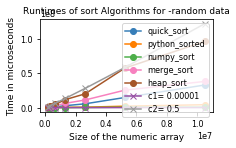

In [17]:
plot_minimum_times('random',100000)

## Plots follow for the already-sorted data set of various sizes.
### We've plotted several plots for different sizes to make the visualization gradual and intuitive.

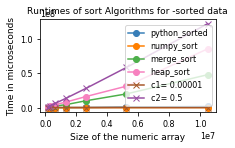

In [21]:
plot_minimum_times('sorted',100000)

## Plots follow for the reverse-sorted data set of various sizes.
### We've plotted several plots for different sizes to make the visualization gradual and intuitive.

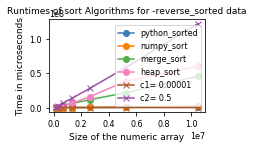

In [25]:
plot_minimum_times('reverse_sorted',100000)

In [8]:
df_min.tail()

,Sort_Type,Data_Type_or_List_type,List_length,Single_runtime
286,quick_sort,sorted,160,0.038033
287,quick_sort,sorted,320,0.030138
288,quick_sort,sorted,640,0.060616
289,quick_sort,sorted,1280,0.056558
290,quick_sort,sorted,2560,0.287958


In [13]:
query = """SELECT Sort_Type, 
Data_Type_or_List_type as List_type,
List_length, 
Single_runtime
FROM df_min 
WHERE List_length= 10485760 
and Data_Type_or_List_type='random' 
ORDER BY Single_runtime"""

table = pd.DataFrame( ps.sqldf(query) )
print(df_min.shape)
table


(291, 4)


,Sort_Type,List_type,List_length,Single_runtime
0,numpy_sort,random,10485760,0.632434
1,python_sorted,random,10485760,4.222582
2,quick_sort,random,10485760,32.919218
3,merge_sort,random,10485760,38.122927
4,heap_sort,random,10485760,96.435979


In [15]:
10485760 * np.log2(10485760)

244548140.74024612

In [16]:
10485760 * np.log2(10485760)*0.5

122274070.37012306

In [17]:
10485760 * np.log2(10485760)*0.00001

2445.481407402461

In [9]:
query = """SELECT Sort_Type, Data_Type_or_List_type as List_type,List_length, Single_runtime 
FROM df_min WHERE Sort_Type='heap_sort' 
and List_type ='random' and List_length> 40000 ORDER BY Single_runtime"""

table = pd.DataFrame( ps.sqldf(query) )
print(df_min.shape)
table

(291, 4)


,Sort_Type,List_type,List_length,Single_runtime
0,heap_sort,random,40960,0.183480
1,heap_sort,random,81920,0.525849
2,heap_sort,random,163840,1.154753
3,heap_sort,random,327680,2.116844
4,heap_sort,random,655360,4.535283
5,heap_sort,random,1310720,11.578997
6,heap_sort,random,2621440,20.032117
7,heap_sort,random,5242880,57.685499
8,heap_sort,random,10485760,96.435979


In [15]:
query = """SELECT Sort_Type, Data_Type_or_List_type as List_type,List_length, Single_runtime 
FROM df_min WHERE Sort_Type='numpy_sort' 
and List_type ='random' and List_length> 40000 ORDER BY List_length"""

table = pd.DataFrame( ps.sqldf(query) )
print(df_min.shape)
table

(291, 4)


,Sort_Type,List_type,List_length,Single_runtime
0,numpy_sort,random,40960,0.037461
1,numpy_sort,random,81920,0.043112
2,numpy_sort,random,163840,0.029619
3,numpy_sort,random,327680,0.026161
4,numpy_sort,random,655360,0.033746
5,numpy_sort,random,1310720,0.068165
6,numpy_sort,random,2621440,0.154086
7,numpy_sort,random,5242880,0.609677
8,numpy_sort,random,10485760,0.632434
